In [7]:
import pandas as pd
import os


directory_path = './si-bol'
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
dataframes = []
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='latin1')
    dataframes.append(df)

combined_dataframe = pd.concat(dataframes, ignore_index=True)


print(combined_dataframe)


      numero_boletim;data hora_boletim;data_inclusao;tipo_acidente;desc_tipo_acidente;cod_tempo;desc_tempo;cod_pavimento;pavimento;cod_regional;desc_regional;origem_boletim;local_sinalizado;velocidade_permitida;coordenada_x;coordenada_y;hora_informada;indicador_fatalidade;valor_ups;descricao_ups;data_alteracao_smsa;valor_ups_antiga;descricao_ups_antiga
0      318;01/01/2013 01:16;02/01/2013 00:00; H01002;...                                                                                                                                                                                                                                                                                                          
1      665;01/01/2013 02:12;20/08/2013 00:00; H06002;...                                                                                                                                                                                                                                          

In [25]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'


df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)


print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)

#columns ordered by index because column have diferent names in diferent files
df_si_bol.set_index(df_si_bol.columns[0], inplace=True)
df_si_env.set_index(df_si_env.columns[0], inplace=True)
df_si_veic.set_index(df_si_veic.columns[0], inplace=True)


joined_df = df_si_bol.join([df_si_env, df_si_veic], how='outer')



si-bol DataFrame shape: (57670, 23)
si-env DataFrame shape: (128616, 20)
si-veic DataFrame shape: (102265, 11)
          data hora_boletim     data_inclusao tipo_acidente  \
90         31/12/2012 21:51  20/08/2013 00:00        H02002   
90         31/12/2012 21:51  20/08/2013 00:00        H02002   
132        31/12/2014 22:30  11/06/2015 00:00        H08002   
132        31/12/2014 22:30  11/06/2015 00:00        H08002   
132        31/12/2014 22:30  11/06/2015 00:00        H08002   
...                     ...               ...           ...   
127700100  15/06/2014 11:13  28/08/2014 00:00        H09002   
127700100  15/06/2014 11:13  28/08/2014 00:00        H09002   
127700100  15/06/2014 11:13  28/08/2014 00:00        H09002   
129328887  23/06/2013 13:40  31/10/2013 00:00        H02002   
129328887  23/06/2013 13:40  31/10/2013 00:00        H02002   

                                          desc_tipo_acidente  cod_tempo  \
90         CAPOTAMENTO/TOMBAMENTO COM VITIMA             

In [32]:
joined_df.head()
columns_to_be_dropped=["data_inclusao","tipo_acidente","data_inclusão",
                       "velocidade_permitida","origem_boletim",
                       "cod_tempo","cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                       "data_hora_boletim"
                       ]

joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')
joined_df.head()

,data hora_boletim,desc_tipo_acidente,desc_tempo,pavimento,cod_regional,desc_regional,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,...,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro
90,31/12/2012 21:51,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,NAO INFORMADO,NAO INFORMADO,22,NOROESTE,60599914.0,79978652.0,SIM,NÃO,...,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA
90,31/12/2012 21:51,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,NAO INFORMADO,NAO INFORMADO,22,NOROESTE,60599914.0,79978652.0,SIM,NÃO,...,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA
132,31/12/2014 22:30,CHOQUE MECANICO COM VITIMA ...,NAO INFORMADO,NAO INFORMADO,24,OESTE,0.0,0.0,SIM,NÃO,...,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO
132,31/12/2014 22:30,CHOQUE MECANICO COM VITIMA ...,NAO INFORMADO,NAO INFORMADO,24,OESTE,0.0,0.0,SIM,NÃO,...,31/12/2014 22:30,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,3.0,AMBULANCIA
132,31/12/2014 22:30,CHOQUE MECANICO COM VITIMA ...,NAO INFORMADO,NAO INFORMADO,24,OESTE,0.0,0.0,SIM,NÃO,...,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO


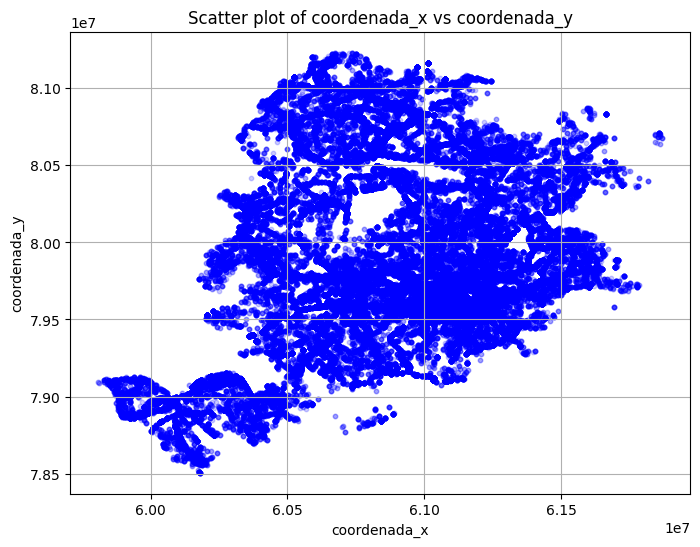

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming joined_df is your large DataFrame containing coordenada_x and coordenada_y columns
# Example DataFrame (replace this with your actual DataFrame)


filtered_df = joined_df[(joined_df['coordenada_x'] > 0) & (joined_df['coordenada_y'] > 0)]

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(filtered_df['coordenada_x'], filtered_df['coordenada_y'], marker='o', color='b',s=10, alpha=0.2)
plt.title('Scatter plot of coordenada_x vs coordenada_y')
plt.xlabel('coordenada_x')
plt.ylabel('coordenada_y')
plt.grid(True)
plt.show()

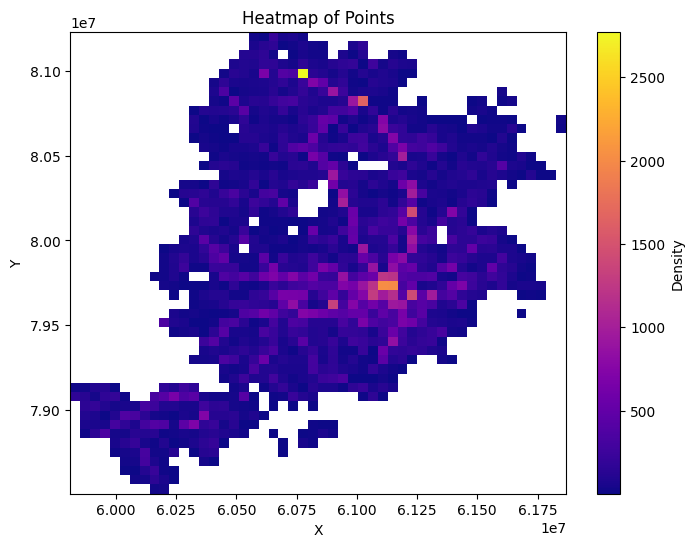

In [59]:

# Create 2D histogram (heatmap)
import numpy as np
plt.figure(figsize=(8, 6))

hist, xedges, yedges, _ = plt.hist2d(filtered_df['coordenada_x'], filtered_df['coordenada_y'], bins=50, cmap='plasma', cmin=1)
plt.colorbar(label='Density')
plt.title('Heatmap of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
